# Decision Tree and Random Forest Project - LendingClub.com

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. The data can be downloaded from [here](https://www.lendingclub.com/info/download-data.action) 

The data contains the following variables:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
df=pd.read_csv('C:\\Users\\aabha.DESKTOP-HG6KK17\\Downloads\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\15-Decision-Trees-and-Random-Forests\\loan_data.csv')

In [122]:
# Visually assessing the data
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [123]:
# checking if duplicate rows exists
sum(df.duplicated())

0

In [124]:
# programatically assessing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


There are no missing records

In [125]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


There seems to be some outliers present in days.with.cr.line and inq.last.6mths

On average 16% of loans were not repaid in this dataset

In [126]:
# Renaming variables to have underscore instead of dot
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [127]:
df.rename(columns = lambda x:x.replace(".","_"), inplace =True)

In [128]:
# confirming the change in variable names
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

#### Exploratory Data Analysis

We'll use seaborn and pandas built-in plotting capabilities

**1. Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

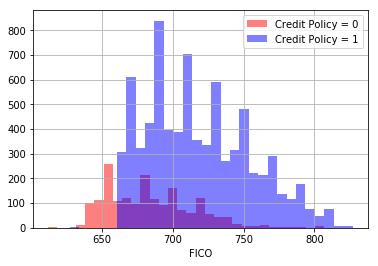

In [129]:
plt.figure(figsize=(6,4))
df[df['credit_policy']==0]['fico'].hist(alpha =0.5, color='red', bins=30, label='Credit Policy = 0')
df[df['credit_policy']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit Policy = 1')
plt.legend()
plt.xlabel('FICO');

Credit Policy 1 means customer meets the credit underwriting criteria. There are more customers with credit policy 1 than credit policy 0. Customers with lower FICO Score have credit policy of 0. Anyone with FICO score of less than 660 does not meet the lending criteria of lendingclub.com

**2. Distribution of FICO score for not_fully_paid values**

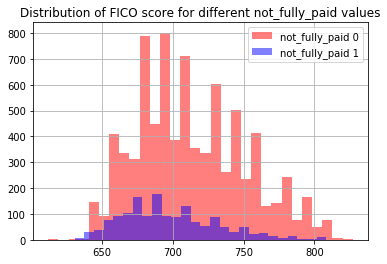

In [156]:
df[df['not_fully_paid']==0]['fico'].hist(alpha=0.5, bins=30, label= 'not_fully_paid 0', color='red')
df[df['not_fully_paid']==1]['fico'].hist(alpha=0.5, bins =30, label='not_fully_paid 1', color='blue')
plt.legend()
plt.title('Distribution of FICO score for different not_fully_paid values');

There is more overlap in this plot. 

**3. Countplot of loans by purpose and not_fully_paid**

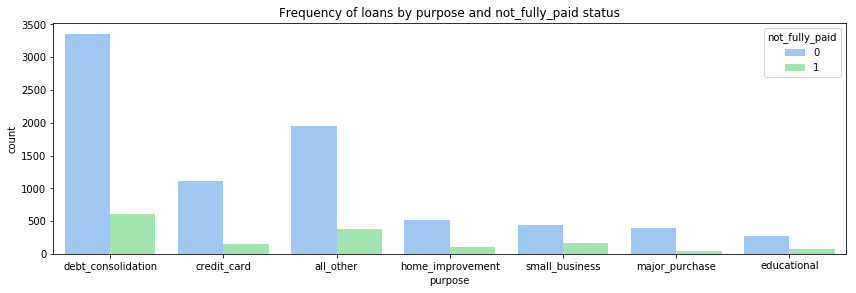

In [131]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='purpose', hue='not_fully_paid', palette='pastel')
plt.tight_layout()
plt.title('Frequency of loans by purpose and not_fully_paid status');

- debt_consolidation is the most common reason for wanting a loan, followed by all_other and credit_card. 

- Loans taken out for home_improvement, small_business, major_purchase, educational are fewer in numbers. 

- The proportion of loans not_fully_paid and fully paid is almost similar across the different reasons. 

**4. Relationship between FICO score and interest rates**

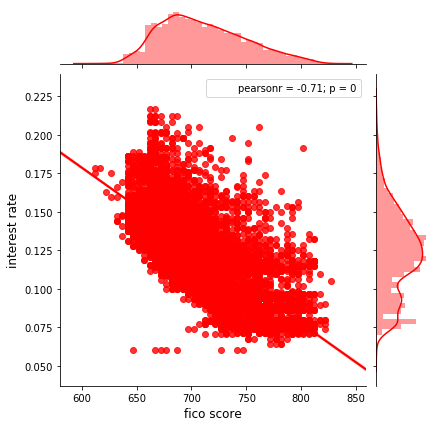

In [132]:
sns.jointplot(data=df, x='fico', y='int_rate', kind='reg', color='r')
plt.xlabel('fico score', fontsize=12)
plt.ylabel('interest rate', fontsize=12);

- As FICO score increases, interest rate decreases

**5. Creating lmplots to see if the trend differed between not_fully_paid and credit_policy.**

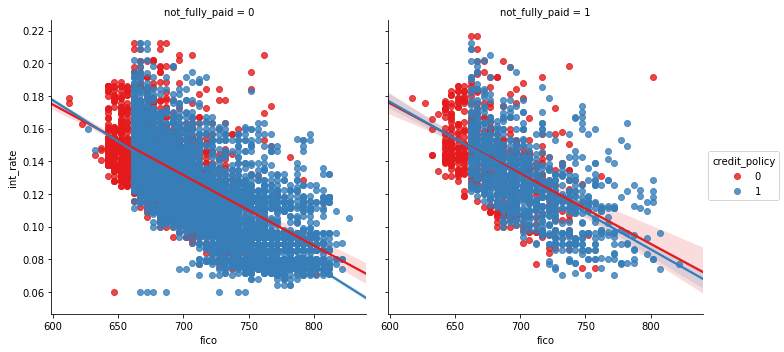

In [133]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int_rate',x='fico',data=df,hue='credit_policy',
           col='not_fully_paid',palette='Set1'); # col parameter helps to split it between two plots accd to not_fully_paid

- The above plots look almost same whether fully paid or not fully paid and whether credit policy of 0 or 1

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check df.info() again.**

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit_policy        9578 non-null int64
purpose              9578 non-null object
int_rate             9578 non-null float64
installment          9578 non-null float64
log_annual_inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days_with_cr_line    9578 non-null float64
revol_bal            9578 non-null int64
revol_util           9578 non-null float64
inq_last_6mths       9578 non-null int64
delinq_2yrs          9578 non-null int64
pub_rec              9578 non-null int64
not_fully_paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Notice that the **purpose** column is categorical

That means we need to transform it using dummy variables so sklearn will be able to understand it.

One way of dealing with this column that can be expanded to multiple categorical features if necessary is as follows:

**Creating a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

**Now using pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [135]:
cat_feats = ['purpose'] # specifies the columns that we want to convert to dummy variables

In [136]:
final_data=pd.get_dummies(df,columns=cat_feats, drop_first=True) #drop_first=True to avoid multi-collinearity issues

In [137]:
final_data.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Splitting our data into a training set and a testing set!

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X = final_data.drop('not_fully_paid', axis=1)
y = final_data['not_fully_paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) 

# random_state so that results are reproducible

## Training a Decision Tree Model

Training a single decision tree first!

In [140]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [141]:
dtree = DecisionTreeClassifier()

In [142]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [143]:
predictions = dtree.predict(X_test)

In [144]:
from sklearn.metrics import classification_report, confusion_matrix

In [145]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.86      0.82      0.84      2431
          1       0.20      0.25      0.22       443

avg / total       0.76      0.73      0.74      2874



In [146]:
print(confusion_matrix(y_test, predictions))

[[1999  432]
 [ 333  110]]


In [147]:
from sklearn.metrics import accuracy_score

print('Accuracy_score of this decision tree model is:{}'.format(accuracy_score(y_test, predictions)))

Accuracy_score of this decision tree model is:0.7338204592901879


## Training the Random Forest model

**Creating an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfc = RandomForestClassifier(n_estimators=600)

In [150]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not_fully_paid for the X_test data.**

In [151]:
predictions=rfc.predict(X_test)

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.48      0.02      0.04       443

avg / total       0.79      0.85      0.78      2874



In [154]:
print(confusion_matrix(y_test, predictions))

[[2420   11]
 [ 433   10]]


In [155]:
print('Accuracy_score of this random forest model is:{}'.format(accuracy_score(y_test, predictions)))

Accuracy_score of this random forest model is:0.8455114822546973


- the accuracy_score of both the models is almost same. 